In [1]:
pip install --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.12.0-py3-none-any.whl

     |████████████████████████████████| 62.0 MB 1.3 MB/s 
     |████████████████████████████████| 50 kB 3.0 MB/s 
     |████████████████████████████████| 3.0 MB 10.3 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you have tensorflow 1.12.0 which is incompatible.


In [2]:
pip install --upgrade tensorflow

     |████████████████████████████████| 489.6 MB 25 kB/s 
     |████████████████████████████████| 5.8 MB 20.7 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.12.2
    Uninstalling tensorboard-1.12.2:
      Successfully uninstalled tensorboard-1.12.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.12.0
    Uninstalling tensorflow-1.12.0:
      Successfully uninstalled tensorflow-1.12.0


In [3]:
import keras
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
forest=pd.read_csv("forestfires.csv")
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


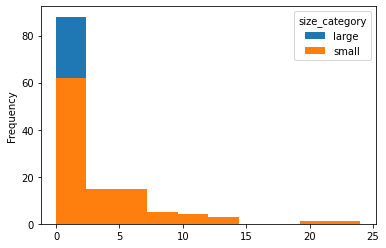

In [8]:
pd.crosstab(forest.FFMC,forest.size_category).plot(kind='hist')


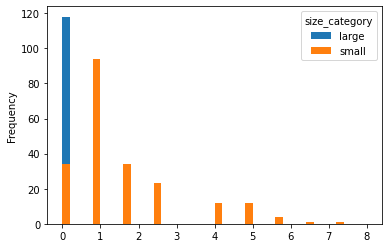

In [9]:
pd.crosstab(forest.DMC,forest.size_category).plot(kind='hist',width=.2)

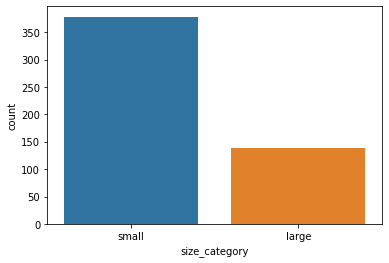

In [10]:
sns.countplot(x='size_category',data=forest)

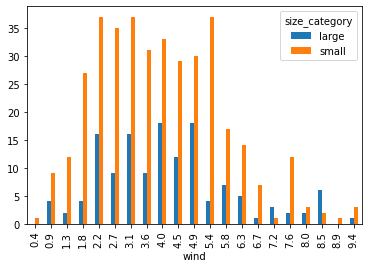

In [11]:
pd.crosstab(forest.wind,forest.size_category).plot(kind='bar')

In [12]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [13]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
forest['size_category']=label.fit_transform(forest['size_category'])
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [14]:
forest1=forest.iloc[:,2:]   #Drop the repeated columes
from sklearn.preprocessing import StandardScaler 

In [15]:
X=forest1.iloc[:,0:28]
Y=forest1.iloc[:,28]
Y.shape,X.shape

((517,), (517, 28))

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()
model.add(Dense(12, input_dim=28, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.fit(X,Y,validation_split=0.3,epochs=100,batch_size=5)

Epoch 1/100
73/73 [==============================] - 1s 5ms/step - loss: 0.6068 - accuracy: 0.7424 - val_loss: 0.6301 - val_accuracy: 0.6731
Epoch 2/100
73/73 [==============================] - 0s 3ms/step - loss: 0.5638 - accuracy: 0.7590 - val_loss: 0.6707 - val_accuracy: 0.6795
Epoch 3/100
73/73 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.7645 - val_loss: 0.5798 - val_accuracy: 0.7179
Epoch 4/100
73/73 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.8061 - val_loss: 0.4558 - val_accuracy: 0.8013
Epoch 5/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8338 - val_loss: 0.4288 - val_accuracy: 0.8013
Epoch 6/100
73/73 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.8781 - val_loss: 0.4119 - val_accuracy: 0.8077
Epoch 7/100
73/73 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.9003 - val_loss: 0.2537 - val_accuracy: 0.8718
Epoch 8/100
7

In [20]:
score=model.evaluate(X,Y)

17/17 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9845


In [21]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 98.45%


In [22]:
model.history.history.keys()

dict_keys([])

In [23]:
history=model.fit(X,Y,validation_split=0.3,epochs=100,batch_size=5)

Epoch 1/100
73/73 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 0.9889 - val_loss: 0.0850 - val_accuracy: 0.9615
Epoch 2/100
73/73 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9972 - val_loss: 0.0989 - val_accuracy: 0.9615
Epoch 3/100
73/73 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9945 - val_loss: 0.1292 - val_accuracy: 0.9423
Epoch 4/100
73/73 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9889 - val_loss: 0.1020 - val_accuracy: 0.9615
Epoch 5/100
73/73 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.9723 - val_loss: 0.1008 - val_accuracy: 0.9551
Epoch 6/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9889 - val_loss: 0.1400 - val_accuracy: 0.9487
Epoch 7/100
73/73 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9861 - val_loss: 0.0877 - val_accuracy: 0.9679
Epoch 8/100
7

In [24]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
import matplotlib.pyplot as plt


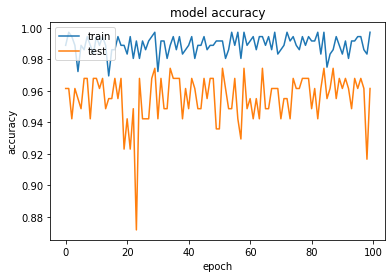

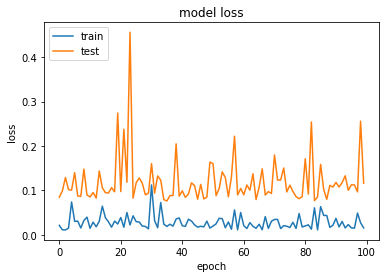

In [27]:
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
!pip install adam

In [32]:
import adam

In [35]:
!pip install keras

In [42]:
!pip install Adam

In [45]:
!pip install tensorflow

In [47]:
from tensorflow.keras.optimizers import Adam

In [50]:
#To improve the accuracy and loss, lets tune the parameters one by one using grid search cv
from sklearn.model_selection import GridSearchCV,KFold
from keras.wrappers.scikit_learn import KerasClassifier


In [53]:
X=forest1.iloc[:,0:28]
Y=forest1.iloc[:,28]

In [54]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
standardized_x=std.fit_transform(X)
standardized_x

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [55]:
#Tuning of batch_size and Epochs
def model1():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [56]:
model=KerasClassifier(build_fn=model1,verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [57]:
batch_size=[5,10,20]
epochs=[10,50,100,150]

In [58]:
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)

In [59]:
grid_result=grid.fit(standardized_x,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=5, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/12] END .....batch_size=5, epochs=10;, score=0.990 total time=   1.8s
[CV 2/5; 1/12] START batch_size=5, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END .....batch_size=5, epochs=10;, score=0.875 total time=   2.0s
[CV 3/5; 1/12] START batch_size=5, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END .....batch_size=5, epochs=10;, score=0.854 total time=   1.7s
[CV 4/5; 1/12] START batch_size=5, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END .....batch_size=5, epochs=10;, score=0.903 total time=   2.0s
[CV 5/5; 1/12] START batch_size=5, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END .....batch_size=5, epochs=10;, score=0.864 total time=   2.0s
[CV 1/5; 2/12] START batch_size=5, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END .....batch_size=5, epochs=50;, score=1.000 total time=   5.8s
[CV 2/5; 2/12] START batch_size=5, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END .....batch_size=5, epochs=50;, score=0.856 total time=   5.5s
[CV 3/5; 2/12] START batch_size=5, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END .....batch_size=5, epochs=50;, score=0.913 total time=   5.6s
[CV 4/5; 2/12] START batch_size=5, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END .....batch_size=5, epochs=50;, score=0.942 total time=   5.8s
[CV 5/5; 2/12] START batch_size=5, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END .....batch_size=5, epochs=50;, score=0.903 total time=   5.7s
[CV 1/5; 3/12] START batch_size=5, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END ....batch_size=5, epochs=100;, score=1.000 total time=  11.3s
[CV 2/5; 3/12] START batch_size=5, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END ....batch_size=5, epochs=100;, score=0.875 total time=  10.9s
[CV 3/5; 3/12] START batch_size=5, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END ....batch_size=5, epochs=100;, score=0.524 total time=  11.0s
[CV 4/5; 3/12] START batch_size=5, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END ....batch_size=5, epochs=100;, score=0.903 total time=  10.6s
[CV 5/5; 3/12] START batch_size=5, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END ....batch_size=5, epochs=100;, score=0.874 total time=  11.0s
[CV 1/5; 4/12] START batch_size=5, epochs=150...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END ....batch_size=5, epochs=150;, score=1.000 total time=  21.2s
[CV 2/5; 4/12] START batch_size=5, epochs=150...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END ....batch_size=5, epochs=150;, score=0.865 total time=  21.2s
[CV 3/5; 4/12] START batch_size=5, epochs=150...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END ....batch_size=5, epochs=150;, score=0.883 total time=  16.0s
[CV 4/5; 4/12] START batch_size=5, epochs=150...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END ....batch_size=5, epochs=150;, score=0.922 total time=  21.2s
[CV 5/5; 4/12] START batch_size=5, epochs=150...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END ....batch_size=5, epochs=150;, score=0.883 total time=  21.2s
[CV 1/5; 5/12] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END ....batch_size=10, epochs=10;, score=0.990 total time=   1.3s
[CV 2/5; 5/12] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END ....batch_size=10, epochs=10;, score=0.856 total time=   1.7s
[CV 3/5; 5/12] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END ....batch_size=10, epochs=10;, score=0.835 total time=   1.3s
[CV 4/5; 5/12] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END ....batch_size=10, epochs=10;, score=0.845 total time=   1.3s
[CV 5/5; 5/12] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END ....batch_size=10, epochs=10;, score=0.903 total time=   1.2s
[CV 1/5; 6/12] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END ....batch_size=10, epochs=50;, score=1.000 total time=   3.2s
[CV 2/5; 6/12] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END ....batch_size=10, epochs=50;, score=0.846 total time=   3.3s
[CV 3/5; 6/12] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END ....batch_size=10, epochs=50;, score=0.893 total time=   3.3s
[CV 4/5; 6/12] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END ....batch_size=10, epochs=50;, score=0.903 total time=   3.2s
[CV 5/5; 6/12] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END ....batch_size=10, epochs=50;, score=0.922 total time=   5.8s
[CV 1/5; 7/12] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END ...batch_size=10, epochs=100;, score=1.000 total time=   5.8s
[CV 2/5; 7/12] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END ...batch_size=10, epochs=100;, score=0.875 total time=  10.9s
[CV 3/5; 7/12] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END ...batch_size=10, epochs=100;, score=0.854 total time=   5.8s
[CV 4/5; 7/12] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END ...batch_size=10, epochs=100;, score=0.942 total time=   6.2s
[CV 5/5; 7/12] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END ...batch_size=10, epochs=100;, score=0.883 total time=  10.9s
[CV 1/5; 8/12] START batch_size=10, epochs=150..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END ...batch_size=10, epochs=150;, score=0.990 total time=   8.4s
[CV 2/5; 8/12] START batch_size=10, epochs=150..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END ...batch_size=10, epochs=150;, score=0.875 total time=   8.3s
[CV 3/5; 8/12] START batch_size=10, epochs=150..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END ...batch_size=10, epochs=150;, score=0.883 total time=  10.9s
[CV 4/5; 8/12] START batch_size=10, epochs=150..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END ...batch_size=10, epochs=150;, score=0.922 total time=  10.9s
[CV 5/5; 8/12] START batch_size=10, epochs=150..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END ...batch_size=10, epochs=150;, score=0.903 total time=  10.9s
[CV 1/5; 9/12] START batch_size=20, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END ....batch_size=20, epochs=10;, score=1.000 total time=   1.0s
[CV 2/5; 9/12] START batch_size=20, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END ....batch_size=20, epochs=10;, score=0.837 total time=   1.0s
[CV 3/5; 9/12] START batch_size=20, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END ....batch_size=20, epochs=10;, score=0.864 total time=   1.0s
[CV 4/5; 9/12] START batch_size=20, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END ....batch_size=20, epochs=10;, score=0.835 total time=   1.0s
[CV 5/5; 9/12] START batch_size=20, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END ....batch_size=20, epochs=10;, score=0.845 total time=   0.9s
[CV 1/5; 10/12] START batch_size=20, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END ...batch_size=20, epochs=50;, score=1.000 total time=   2.4s
[CV 2/5; 10/12] START batch_size=20, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END ...batch_size=20, epochs=50;, score=0.827 total time=   2.0s
[CV 3/5; 10/12] START batch_size=20, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END ...batch_size=20, epochs=50;, score=0.893 total time=   3.2s
[CV 4/5; 10/12] START batch_size=20, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END ...batch_size=20, epochs=50;, score=0.922 total time=   3.2s
[CV 5/5; 10/12] START batch_size=20, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END ...batch_size=20, epochs=50;, score=0.835 total time=   2.0s
[CV 1/5; 11/12] START batch_size=20, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END ..batch_size=20, epochs=100;, score=0.990 total time=   3.4s
[CV 2/5; 11/12] START batch_size=20, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END ..batch_size=20, epochs=100;, score=0.865 total time=   5.8s
[CV 3/5; 11/12] START batch_size=20, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END ..batch_size=20, epochs=100;, score=0.883 total time=   3.3s
[CV 4/5; 11/12] START batch_size=20, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END ..batch_size=20, epochs=100;, score=0.903 total time=   5.8s
[CV 5/5; 11/12] START batch_size=20, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END ..batch_size=20, epochs=100;, score=0.893 total time=   5.8s
[CV 1/5; 12/12] START batch_size=20, epochs=150.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END ..batch_size=20, epochs=150;, score=1.000 total time=   6.2s
[CV 2/5; 12/12] START batch_size=20, epochs=150.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END ..batch_size=20, epochs=150;, score=0.885 total time=   4.7s
[CV 3/5; 12/12] START batch_size=20, epochs=150.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END ..batch_size=20, epochs=150;, score=0.874 total time=   4.7s
[CV 4/5; 12/12] START batch_size=20, epochs=150.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END ..batch_size=20, epochs=150;, score=0.922 total time=   4.7s
[CV 5/5; 12/12] START batch_size=20, epochs=150.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END ..batch_size=20, epochs=150;, score=0.874 total time=   4.6s


In [60]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9226101517677308, using {'batch_size': 5, 'epochs': 50}
0.8973487734794616,0.0492754070862842 with: {'batch_size': 5, 'epochs': 10}
0.9226101517677308,0.04756239586822887 with: {'batch_size': 5, 'epochs': 50}
0.8351941704750061,0.1621686189357881 with: {'batch_size': 5, 'epochs': 100}
0.9109410047531128,0.048255876104978626 with: {'batch_size': 5, 'epochs': 150}
0.8857356309890747,0.05728991308279339 with: {'batch_size': 10, 'epochs': 10}
0.912920081615448,0.05023558145164511 with: {'batch_size': 10, 'epochs': 50}
0.9109223246574402,0.053152566708316015 with: {'batch_size': 10, 'epochs': 100}
0.9148244976997375,0.041170572170070474 with: {'batch_size': 10, 'epochs': 150}
0.876045560836792,0.0628371078412309 with: {'batch_size': 20, 'epochs': 10}
0.8954816937446595,0.06326815081775147 with: {'batch_size': 20, 'epochs': 50}
0.9070761799812317,0.04346107552356774 with: {'batch_size': 20, 'epochs': 100}
0.9109036445617675,0.04798995525509956 with: {'batch_size': 20, 'epochs': 150}

In [61]:
#tuning of learning rate and dropout rate
from keras.layers import Dropout
def model2(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    adam=Adam(learning_rate)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [62]:
model = KerasClassifier(build_fn = model2,verbose = 0,batch_size = 5,epochs = 150)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [63]:
learning_rate=[0.1,0.001,0.0001]
dropout_rate=[0.0,0.01,0.1]

In [64]:
param_grid=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)

In [65]:
grid_result=grid.fit(standardized_x,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=  21.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.750 total time=  21.2s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.524 total time=  21.2s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.680 total time=  21.2s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.699 total time=  21.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 2/9] END d

In [67]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9283980607986451, using {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9187266588211059,0.047822374909467634 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.874159836769104,0.06017296054114781 with: {'dropout_rate': 0.0, 'learning_rate': 0.0001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.01, 'learning_rate': 0.1}
0.922591483592987,0.038074284235332795 with: {'dropout_rate': 0.01, 'learning_rate': 0.001}
0.8741784930229187,0.06315419651652084 with: {'dropout_rate': 0.01, 'learning_rate': 0.0001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9283980607986451,0.040687024858257176 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.8644697546958924,0.07044098403475332 with: {'dropout_rate': 0.1, 'learning_rate': 0.0001}


In [68]:
#tuning of Kernel_initializer and activation parameter
def model3(activation,kernel_initializer):
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer=kernel_initializer, activation=activation))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer=kernel_initializer, activation=activation))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    adam=Adam(0.001)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [69]:
model = KerasClassifier(build_fn = model3,verbose = 0,batch_size = 20,epochs = 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [70]:
kernel_initializer=['uniform','normal','zero']
activation=['softmax','relu','tanh','linear']

In [71]:
param_grid=dict( kernel_initializer=kernel_initializer, activation=activation)
grid=GridSearchCV(estimator=model,cv=KFold(),param_grid=param_grid,verbose=10)

In [72]:
grid_results=grid.fit(standardized_x,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation=softmax, kernel_initializer=uniform.............
[CV 1/5; 1/12] END activation=softmax, kernel_initializer=uniform;, score=0.981 total time=   3.6s
[CV 2/5; 1/12] START activation=softmax, kernel_initializer=uniform.............
[CV 2/5; 1/12] END activation=softmax, kernel_initializer=uniform;, score=0.750 total time=   3.5s
[CV 3/5; 1/12] START activation=softmax, kernel_initializer=uniform.............
[CV 3/5; 1/12] END activation=softmax, kernel_initializer=uniform;, score=0.524 total time=   5.9s
[CV 4/5; 1/12] START activation=softmax, kernel_initializer=uniform.............
[CV 4/5; 1/12] END activation=softmax, kernel_initializer=uniform;, score=0.728 total time=   6.3s
[CV 5/5; 1/12] START activation=softmax, kernel_initializer=uniform.............
[CV 5/5; 1/12] END activation=softmax, kernel_initializer=uniform;, score=0.767 total time=   5.9s
[CV 1/5; 2/12] START activation=softmax

In [73]:
# Summarize the results
print('Best : {}, using {}'.format(grid_results.best_score_,grid_results.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9592979788780213, using {'activation': 'tanh', 'kernel_initializer': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9187266588211059,0.047822374909467634 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.874159836769104,0.06017296054114781 with: {'dropout_rate': 0.0, 'learning_rate': 0.0001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.01, 'learning_rate': 0.1}
0.922591483592987,0.038074284235332795 with: {'dropout_rate': 0.01, 'learning_rate': 0.001}
0.8741784930229187,0.06315419651652084 with: {'dropout_rate': 0.01, 'learning_rate': 0.0001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9283980607986451,0.040687024858257176 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.8644697546958924,0.07044098403475332 with: {'dropout_rate': 0.1, 'learning_rate': 0.0001}


In [74]:
#tuning of No. of neurons 
def model4(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=28, kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    adam=Adam(0.001)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [75]:
model=KerasClassifier(build_fn=model4,verbose=0,batch_size=5,epochs=150)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [76]:
neuron1=[4,8,16]
neuron2=[2,4,8]

In [77]:
param_grid=dict(neuron1=neuron1,neuron2=neuron2)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)

In [78]:
grid_result=grid.fit(standardized_x,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=  21.3s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.904 total time=  15.0s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.913 total time=  15.1s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.942 total time=  21.2s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.951 total time=  21.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [79]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9554331541061402, using {'neuron1': 4, 'neuron2': 8}
0.9419342756271363,0.033977298174622195 with: {'neuron1': 4, 'neuron2': 2}
0.9496079087257385,0.028412310122185234 with: {'neuron1': 4, 'neuron2': 4}
0.9554331541061402,0.02574680009311949 with: {'neuron1': 4, 'neuron2': 8}
0.9457430958747863,0.030441654663211172 with: {'neuron1': 8, 'neuron2': 2}
0.9476848363876342,0.028515745495205004 with: {'neuron1': 8, 'neuron2': 4}
0.9535100817680359,0.025563387902815017 with: {'neuron1': 8, 'neuron2': 8}
0.9322815418243409,0.04438762702369419 with: {'neuron1': 16, 'neuron2': 2}
0.9496452569961548,0.028983894211835056 with: {'neuron1': 16, 'neuron2': 4}
0.9496452569961548,0.029627185975445405 with: {'neuron1': 16, 'neuron2': 8}


In [80]:
#Building Final model using all these parameters
from sklearn.metrics import classification_report, accuracy_score

def model_final():
    model=Sequential()
    model.add(Dense(4,input_dim=28,kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.01))
    model.add(Dense(8,input_dim=4,kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    adam=Adam(lr=0.001)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
   
    return model

In [81]:
model=KerasClassifier(build_fn=model_final,batch_size=20,epochs=100,verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [82]:
model.fit(standardized_x,Y)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [83]:
y_predict=model.predict(standardized_x)

In [84]:
print(accuracy_score(Y,y_predict))

0.9941972920696325


In [85]:
#final model is having 98.64% accuracy by using the grid search parameters